In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) 
from sidm.tools import ffschema, sidm_processor, utilities, scaleout
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
import mplhep as hep

# Load style sheet
# plt.style.use(hep.style.CMS)  # or ATLAS/LHCb2

# h, bins = np.histogram(np.random.random(1000))
# fig, ax = plt.subplots()
# hep.histplot(h, bins)

utilities.set_plot_style()

In [2]:
#client = scaleout.make_dask_client("tls://localhost:8786")
#client

In [3]:
SIDM_samples = [
    #"2Mu2E_100GeV_1p2GeV_9p6mm", 
    #"4Mu_100GeV_1p2GeV_9p6mm",
    
    "2Mu2E_1000GeV_0p25GeV_0p02mm",
    #"4Mu_1000GeV_0p25GeV_0p02mm"

]


samples = [
    "DYJetsToLL_M10to50", # Background
    "DYJetsToLL_M50",
    
    "QCD_Pt15to20", #Works
    "QCD_Pt20to30", #issue, needs many files to fill all histograms
    "QCD_Pt30to50", #Broken, throws KeyError: 'akjet_ak4PFJetsCHS_jetid'
    "QCD_Pt50to80", #Works
    "QCD_Pt80to120", #Works
    #"QCD_Pt120to170", #Broken, Exception: Failed processing file: WorkItem(dataset='QCD_Pt120to170' ...)
    "QCD_Pt170to300", #Works
    "QCD_Pt300to470", #Works
    "QCD_Pt470to600", #Works
    "QCD_Pt600to800", #Works
    "QCD_Pt800to1000", #Works
    "QCD_Pt1000toInf", #Works
    
    "TTJets",
    
    "WW",
    "WZ",
    "ZZ",
]

for sample in SIDM_samples:
    samples.append(sample)

for sample in samples:
    print("Sample: " + sample)
    
fileset = utilities.make_fileset(samples, "ffntuple_v2", max_files=8) #max_files argument was removed, so it defaults to use all the files in each sample
#fileset = utilities.make_fileset(samples, "ffntuple_v2", max_files=1) #CHANGED: background appears to use v2 ntuples instead of v4

Sample: DYJetsToLL_M10to50
Sample: DYJetsToLL_M50
Sample: QCD_Pt15to20
Sample: QCD_Pt20to30
Sample: QCD_Pt30to50
Sample: QCD_Pt50to80
Sample: QCD_Pt80to120
Sample: QCD_Pt170to300
Sample: QCD_Pt300to470
Sample: QCD_Pt470to600
Sample: QCD_Pt600to800
Sample: QCD_Pt800to1000
Sample: QCD_Pt1000toInf
Sample: TTJets
Sample: WW
Sample: WZ
Sample: ZZ
Sample: 2Mu2E_1000GeV_0p25GeV_0p02mm


In [4]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.DaskExecutor(client=client),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = [
            "baseNoLj"
           ] # NOTE: the channel used determines the cuts applied. baseNoLj removes the checks for multiple jets.

hist_menu = utilities.load_yaml("../configs/hist_collections.yaml")
hist_choice = "test"
collection = utilities.flatten(hist_menu[hist_choice]) #To change the histograms used, swap "base" for the other collections
print(collection)

p = sidm_processor.SidmProcessor(
    channels, [hist_choice]) # not sure if base_plus_gen applies to the background

# test if processor is serializable
import coffea.util as coffea_util
coffea_util.save(p, "processor.coffea")
print(coffea_util.load("processor.coffea"))


output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

# Overall, this takes the samples listed in "samples" (section [2]), then processes them in the sidm_processor function.
# Without actual background data, I'm not sure of the format I should use for the samples, or whether the "base_plus_gen" set applies here.
# Regardless, the histograms generated should be stored in the variable "out".


Output()

['lj_pt']


Output()

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

In [5]:
#These flags show whether DY, QCD, and dibosons should be combined into one variable.
bosons = True
QCD = True
DY = True
ttbar = True
#If this is true, all background samples will be combined into one. This automatically disables the other groupings.
TotalBackground = False

if TotalBackground == True:
    DY = False
    QCD = False
    bosons = False
    ttbar = False
    
sample_list = []
if DY == True:
    sample_list.append("DY_Jets")
if QCD == True:
    sample_list.append("QCD_Jets")
if bosons == True:
    sample_list.append("DiBoson_Jets")
if ttbar == True:
    sample_list.append("TT")
    
for sample in samples:
    if (sample[0] != 'D' and DY == True) and (sample[0] != 'Q' and QCD == True) and (sample[0] != 'W' and bosons == True) and (sample[0] != 'Z' and bosons == True) and (sample != 'TT' and ttbar == True):
        sample_list.append(sample)
        
QCD_samples = ["QCD_Pt15to20","QCD_Pt20to30","QCD_Pt30to50","QCD_Pt50to80","QCD_Pt80to120","QCD_Pt120to170",
               "QCD_Pt170to300","QCD_Pt300to470","QCD_Pt470to600","QCD_Pt600to800","QCD_Pt800to1000","QCD_Pt1000toInf"]

# post-processing, adds together all the histograms in the Drell-Yan set into DY_Hists

if DY == True:
    DY_Hists = output['out']["DYJetsToLL_M10to50"]["hists"]
    DY_Cutflow = output['out']["DYJetsToLL_M10to50"]["cutflow"]
    for channel in channels:
        DY_Cutflow[channel] = DY_Cutflow[channel] + output['out']["DYJetsToLL_M50"]["cutflow"][channel]
# Also adds together all QCD samples used
if QCD == True:
    QCD_Hists = output['out']["QCD_Pt15to20"]["hists"]
    QCD_Cutflow = output['out']["QCD_Pt15to20"]["cutflow"]
    for sample in samples:
        if (sample[0] == 'Q') and (sample != "QCD_Pt15to20"):
            for channel in channels:
                QCD_Cutflow[channel] = QCD_Cutflow[channel] + output['out'][sample]["cutflow"][channel]
# Now adds diboson samples together (not sure if TT_ is a diboson, might be quarks)
if bosons == True:
    DiBoson_Hists = output['out']["WW"]["hists"]     
    DiBoson_Cutflow = output['out']["WW"]["cutflow"]
    for channel in channels:
        DiBoson_Cutflow[channel] = DiBoson_Cutflow[channel] + output['out']["ZZ"]["cutflow"][channel]
        DiBoson_Cutflow[channel] = DiBoson_Cutflow[channel] + output['out']["WZ"]["cutflow"][channel]
    
if ttbar == True:
    TT_Hists = output['out']['TTJets']["hists"]
    TT_Cutflow = output['out']['TTJets']["cutflow"]
    
if TotalBackground == True:
    bg_Hists = output['out']["DYJetsToLL_M10to50"]["hists"]
    bg_Cutflow = output['out']["DYJetsToLL_M10to50"]["cutflow"]
    for sample in samples:
        if (sample[0] == 'D') or (sample[0] == 'Q') or (sample[0] == 'W') or (sample[0] == 'Z') and (sample != "DYJetsToLL_M10to50"):
            for channel in channels:
                bg_Cutflow[channel] = bg_Cutflow[channel] + output['out'][sample]["cutflow"][channel]
                
                
hist_menu = utilities.load_yaml("../configs/hist_collections.yaml")
collection = utilities.flatten(hist_menu[hist_choice]) #To change the histograms used, swap "base" for the other collections
#collection.remove("lj_pfiso") #lj_pfiso is bugged, this line removes it

for hist_name in collection:
    if DY == True:
        #print("Adding " + hist_name + " to DY_Hists")
        DY_Hists[hist_name] = DY_Hists[hist_name] + output['out']["DYJetsToLL_M50"]["hists"][hist_name]
    if QCD == True:
        for sample in samples:
            if (sample[0] == 'Q') and (sample != "QCD_Pt15to20"):
                QCD_Hists[hist_name] = QCD_Hists[hist_name] + output['out'][sample]["hists"][hist_name]
    if bosons == True:
        DiBoson_Hists[hist_name] = DiBoson_Hists[hist_name] + output['out']["WZ"]["hists"][hist_name]
        DiBoson_Hists[hist_name] = DiBoson_Hists[hist_name] + output['out']["ZZ"]["hists"][hist_name]
    if TotalBackground == True:
        for sample in samples:
            if (sample[0] == 'D') or (sample[0] == 'Q') or (sample[0] == 'W') or (sample[0] == 'Z') and (sample != "DYJetsToLL_M10to50"):
                bg_Hists[hist_name] = bg_Hists[hist_name] + output['out'][sample]["hists"][hist_name]
                
            #print("Adding  " + sample + ' ' + hist_name + " histogram to QCD_Pt15to20")
# IMPORTANT: This sets DY_10to50 as the base for the DY_Hists. When DY_Hists is changed, so is DY_10to50. This
#            shouldn't matter, since the only one used will be DY_Hists in most cases, but this needs to be fixed.
#            The same issue is present with QCD_15to20 and QCD_Hists.

#IMPORTANT: I've commented out the lj_pfiso histogram in hist_collections.yaml, since it is consistently giving an error

In [6]:
#This defines a function to break down the samples and make individual subplots for each one.
#First, it makes a list of all samples, replacing the individual background ones with any aggregates
#(DY, QCD, bosons). This does not include the total background one, since that can be plotted with a single function
#rather than this process. Next, it cycles through the list and plots all the samples.
#Note to fix: if one of the aggregates is disabled, the ordering of the plots breaks.
#Also, the argument nrow is now determined from number of samples and number of columns, so the input parameter is unnecessary.
# I should also set the specific range as a parameter. For now, it uses [ :1200j], and that seems to change as needed, but it could be an issue in the future.
sample_list = []
if DY == True:
    sample_list.append("DY_Jets")
if QCD == True:
    sample_list.append("QCD_Jets")
if bosons == True:
    sample_list.append("DiBoson_Jets")
if ttbar == True:
    sample_list.append("TTJets")
if TotalBackground == True:
    sample_list.append("Total Background")
for sample in samples:
    if (sample[0] != 'D') and (sample[0] != 'Q') and (sample[0] != 'W') and (sample[0] != 'Z') and (sample[0] != 'T'):
        sample_list.append(sample)
        
def plotSamples(hists, channel, errorBars, densityPlot, nrow=2, ncol=4, samples=sample_list, fullBg=TotalBackground):
    #Note that nrow gets overwritten. Might want to remove that.
    if fullBg == False:
        nplots = len(samples)
        nrow = (nplots-1)//ncol + 1
        if (nplots <= 5):
            ncol = nplots
            nrow = 1
        plt.subplots(nrow, ncol, figsize=(ncol*12, nrow*9))
        counter = 1
        print("Now plotting " + hists[0], end='')
        while counter < len(hists):
            print(" and " + hists[counter], end='')
            counter += 1
        print('.')
        
        DY_flag = False
        QCD_flag = False
        DB_flag = False
        TT_flag = False
        totBg_flag = False
        
        for i in range(nplots):
            skip = False
            plt.subplot(nrow, ncol, i+1)
            plt.rcParams['font.size'] = 16
            
            if (DY == True and DY_flag == False and skip != True):
                for hist in hists:
                    utilities.plot(DY_Hists[hist][channel, :1200j], yerr=errorBars, density=densityPlot, flow='none')
                if len(hists) > 1:
                    plt.legend(hists)
                plt.title(samples[i])
                skip = True
                DY_flag = True
            if (QCD == True and QCD_flag == False and skip != True):
                for hist in hists:
                    utilities.plot(QCD_Hists[hist][channel, :1200j], yerr=errorBars, density=densityPlot, flow='none')
                if len(hists) > 1:
                    plt.legend(hists)
                plt.title(samples[i])
                skip = True
                QCD_flag = True
            if (bosons == True and DB_flag == False and skip != True):
                for hist in hists:
                    utilities.plot(DiBoson_Hists[hist][channel, :1200j], yerr=errorBars, density=densityPlot, flow='none')
                if len(hists) > 1:
                    plt.legend(hists)
                plt.title(samples[i])
                skip = True
                DB_flag = True
            if (ttbar == True and TT_flag == False and skip != True):
                for hist in hists:
                    utilities.plot(TT_Hists[hist][channel, :1200j], yerr=errorBars, density=densityPlot, flow='none')
                if len(hists) > 1:
                    plt.legend(hists)
                plt.title(samples[i])
                skip = True
                TT_flag = True
            elif (i <= nplots and skip != True):
                for hist in hists:
                    utilities.plot(out[samples[i]]["hists"][hist][channel, :1200j], yerr=errorBars, density=densityPlot, flow='none')
                if len(hists) > 1:
                    plt.legend(hists)
                plt.title(samples[i])

    else: #case that background is combined together
        nplots = len(SIDM_samples) + 1
        if nplots <= 5:
            ncol = nplots
            nrow = 1
        else:
            nrow = (nplots-1)//ncol + 1
        plt.subplots(nrow, ncol, figsize=(ncol*12, nrow*9))
        counter = 1
        print("Now plotting " + hists[0], end='')
        while counter < len(hists):
            print(" and " + hists[counter], end='')
            counter += 1
        print('.')
        for i in range(nplots):
            plt.subplot(nrow, ncol, i+1)
            plt.rcParams['font.size'] = 16
            
            
            
            if i == 0:
                for hist in hists:
                    utilities.plot(bg_Hists[hist][channel, :1200j], yerr=errorBars, density=densityPlot, flow='none')
                if len(hists) > 1:
                    plt.legend(hists)
                print(i)
                print(samples[i])
                plt.title(samples[i])
                
                
                
            elif i <= nplots:
                for hist in hists:
                    utilities.plot(out[samples[i]]["hists"][hist][channel, :1200j], yerr=errorBars, density=densityPlot, flow='none')
                if len(hists) > 1:
                    plt.legend(hists)
                plt.title(samples[i])

In [7]:
def plotHists(hists, channel, errorBars, densityPlot, samples=sample_list, fullBg=TotalBackground):
    #Note that nrow gets overwritten. Might want to remove that.
    nplots = len(hists)
    if (nplots <= 5):
        ncol = nplots
        nrow = 1
    else:
        ncol = 4
        nrow = (nplots-1)//ncol + 1
    plt.subplots(nrow, ncol, figsize=(ncol*12, nrow*9))
    for i in range(nplots):
        DY_Flag = False
        QCD_Flag = False
        DB_Flag = False
        TT_Flag = False
        Tot_BG_Flag = False
        plt.subplot(nrow, ncol, i+1)
        plt.rcParams['font.size'] = 16
        j = 0
        while j < len(samples):
            if DY == True and DY_Flag == False:
                utilities.plot(DY_Hists[hists[i]][channel, :1200j], yerr=errorBars, density=densityPlot, flow='none')
                j = j + 1
                DY_Flag = True
            if QCD == True and QCD_Flag == False:
                utilities.plot(QCD_Hists[hists[i]][channel, :1200j], yerr=errorBars, density=densityPlot, flow='none')
                j = j + 1
                QCD_Flag = True
            if bosons == True and DB_Flag == False:
                utilities.plot(DiBoson_Hists[hists[i]][channel, :1200j], yerr=errorBars, density=densityPlot, flow='none')
                j = j + 1
                DB_Flag = True
            if ttbar == True and TT_Flag == False:
                utilities.plot(TT_Hists[hists[i]][channel, :1200j], yerr=errorBars, density=densityPlot, flow='none')
                j = j+1
                TT_Flag = True
            if fullBg == True and Tot_BG_Flag == False:
                utilities.plot(bg_Hists[hists[i]][channel, :1200j], yerr=errorBars, density=densityPlot, flow='none')
                j = j + 1
                Tot_BG_Flag = True
            utilities.plot(out[samples[j]]["hists"][hists[i]][channel, :1200j], yerr=errorBars, density=densityPlot, flow='none')
            j = j + 1
        if len(samples) > 1:
            plt.legend(samples)
        plt.title(hists[i])

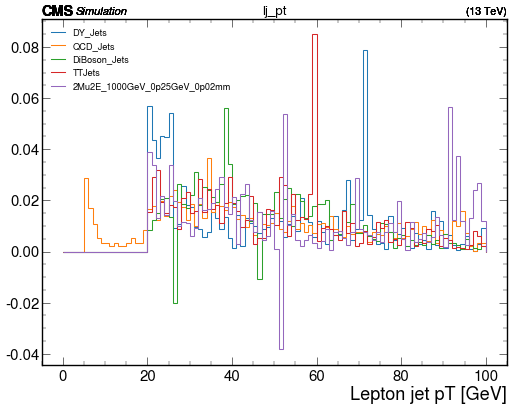

In [8]:
plotHists(["lj_pt"], "baseNoLj", False, True, sample_list)

Now plotting lj_pt.


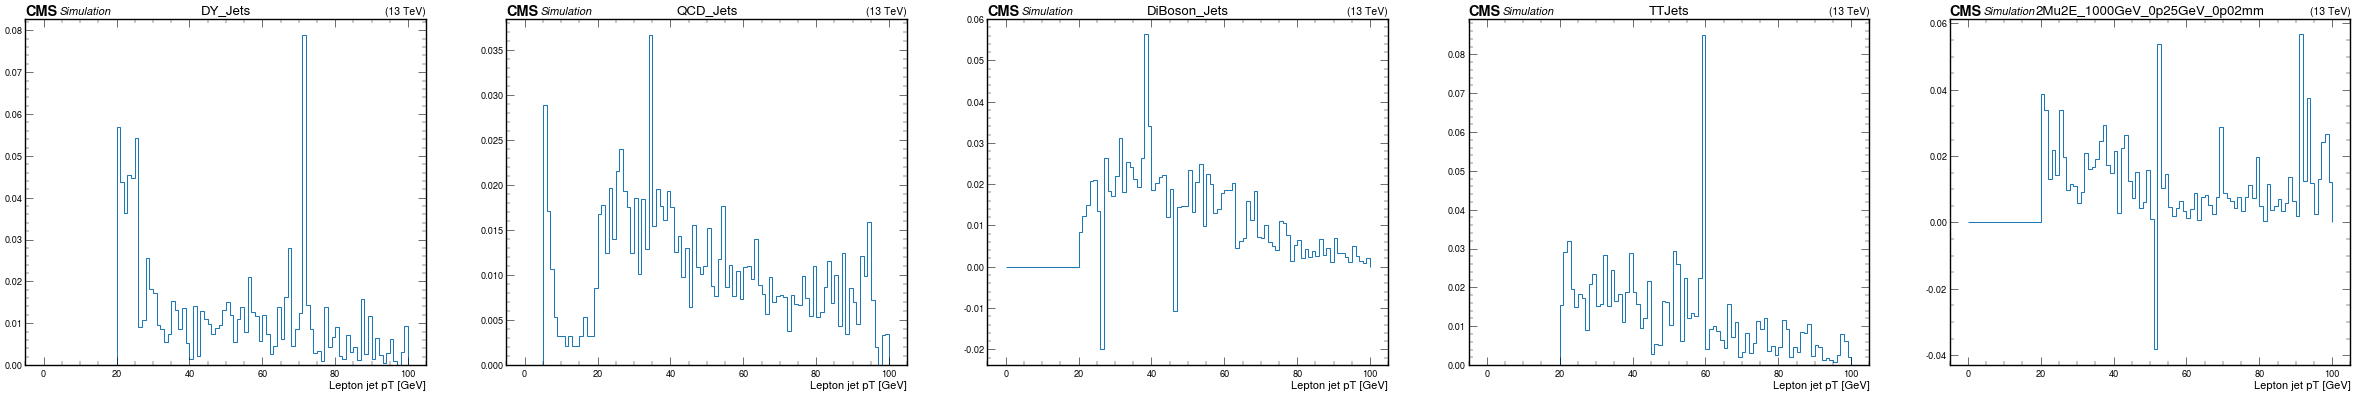

In [9]:
plotSamples(["lj_pt"], "baseNoLj", False, True, sample_list)